# Read and explore the given dataset.  ( Rename column/add headers, plot histograms, find data characteristics)

In [98]:
!pip install scikit-surprise
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [99]:
#Loading data
df_electronics = pd.read_csv("ratings_Electronics.csv")
df_electronics.columns = ['userId', 'productId', 'ratings', 'timestamp']

In [100]:
df_electronics.head()

,userId,productId,ratings,timestamp
0,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
1,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
2,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
3,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200
4,A1QGNMC6O1VW39,0511189877,5.0,1397433600


In [101]:
df_electronics.drop('timestamp',axis=1,inplace=True)

In [102]:
df_electronics.shape

(7824481, 3)

In [103]:
df_electronics.isna().sum()

userId       0
productId    0
ratings      0
dtype: int64

In [104]:
df_electronics.isnull().sum()

userId       0
productId    0
ratings      0
dtype: int64

No Null or NA value in the dataset

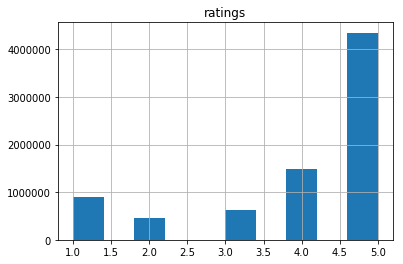

In [105]:
import matplotlib.pyplot as plt 
# create histogram for numeric data 
df_electronics.hist() 
  
# show plot 
plt.show() 

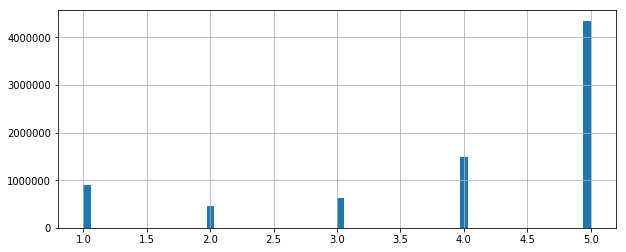

In [106]:
plt.figure(figsize =(10, 4)) 
  
df_electronics['ratings'].hist(bins = 70)

Rating 5 was given Maximum time and then 4,1,2 and then 0

In [107]:
df_electronics['productId'].unique()

array(['0321732944', '0439886341', '0511189877', ..., 'BT008T2BGK',
       'BT008UKTMW', 'BT008V9J9U'], dtype=object)

# Take a subset of the dataset to make it less sparse/ denser. ( For example, keep the users only who has given 50 or more number of ratings )

In [108]:
df_electronicsSample=df_electronics[df_electronics.groupby('userId')['userId'].transform('size') >=50]

In [109]:
value_counts = df_electronics['userId'].value_counts()
to_remove = value_counts[value_counts >=50].index
df_electronicsSample = df_electronics[df_electronics.userId.isin(to_remove)]

In [110]:
df_electronicsSample.head()

,userId,productId,ratings
93,A3BY5KCNQZXV5U,0594451647,5.0
117,AT09WGFUM934H,0594481813,3.0
176,A32HSNCNPRUMTR,0970407998,1.0
177,A17HMM1M7T9PJ1,0970407998,4.0
491,A3CLWR1UUZT6TG,0972683275,5.0


# Build Popularity Recommender model.

In [127]:
df_electronicsSample.groupby('userId')['ratings'].count().sort_values(ascending=False).head()

userId
A5JLAU2ARJ0BO     520
ADLVFFE4VBT8      501
A3OXHLG6DIBRW8    498
A6FIAB28IS79      431
A680RUE1FDO8B     406
Name: ratings, dtype: int64

In [128]:
df_electronicsSample.groupby('productId')['ratings'].mean().sort_values(ascending=False).head()  

productId
B00LKG1MC8    5.0
B002QUZM3M    5.0
B002QWNZHU    5.0
B002QXZPFE    5.0
B002R0DWNS    5.0
Name: ratings, dtype: float64

In [129]:
# Group the product by productID , calculate count of ratings meaning how many people rated ,sort as well then  print head() 

df_electronicsSample.groupby('productId')['ratings'].count().sort_values(ascending=False).head()  

productId
B0088CJT4U    206
B003ES5ZUU    184
B000N99BBC    167
B007WTAJTO    164
B00829TIEK    149
Name: ratings, dtype: int64

In [130]:
# New pandas dataframe with rating mean calculated, In steps above: we were only checking it out 

ratings_mean_count = pd.DataFrame(df_electronicsSample.groupby('productId')['ratings'].mean()) 
ratings_mean_count

,ratings
productId,
0594451647,5.000000
0594481813,3.000000
0970407998,2.500000
0972683275,4.750000
1400501466,3.333333
1400501520,5.000000
1400501776,4.500000
1400532620,3.000000
1400532655,3.833333


In [131]:
# Add a column with rating_counts in the new dataframe with count values 
ratings_mean_count['rating_counts'] = pd.DataFrame(df_electronicsSample.groupby('productId')['ratings'].count())  
ratings_mean_count

,ratings,rating_counts
productId,,
0594451647,5.000000,1
0594481813,3.000000,1
0970407998,2.500000,2
0972683275,4.750000,4
1400501466,3.333333,6
1400501520,5.000000,1
1400501776,4.500000,2
1400532620,3.000000,2
1400532655,3.833333,6


In [132]:
# Now you can pick top n products as per need to display on the product recommendation website based on the popularity  

ratings_mean_count.sort_values(by='rating_counts', ascending=False)

,ratings,rating_counts
productId,,
B0088CJT4U,4.218447,206
B003ES5ZUU,4.864130,184
B000N99BBC,4.772455,167
B007WTAJTO,4.701220,164
B00829TIEK,4.436242,149
B008DWCRQW,4.094891,137
B00829THK0,4.416058,137
B002R5AM7C,4.125000,128
B004CLYEDC,4.669492,118


# Build Collaborative Filtering model.

In [118]:
from surprise import KNNWithMeans
from surprise import Dataset
from surprise import accuracy
from surprise import SVD, SVDpp, SlopeOne, NMF, NormalPredictor, KNNBaseline, KNNBasic, KNNWithMeans, KNNWithZScore, BaselineOnly, CoClustering,KNNBaseline,NMF,KNNBasic,KNNWithMeans,KNNWithZScore,CoClustering
from surprise.model_selection import cross_validate
from surprise import Reader

In [119]:
df_new.head()
df_new_frac = df_electronicsSample.sample(frac=0.1)

In [120]:
reader = Reader(rating_scale=(1, 5))


In [121]:
data_df = Dataset.load_from_df(df_new_frac[['userId', 'productId', 'ratings']], reader)

In [122]:
data_df

In [123]:
trainset_df1, testset_df1 = train_test_split(data_df, test_size=.3)

In [138]:
algo = KNNWithMeans(k=50, sim_options={'name': 'pearson_baseline', 'user_based': False})
algo.fit(trainset_df1)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [139]:
test_pred = algo.test(testset_df1)
test_pred

[Prediction(uid='A95PWI4S6WHGL', iid='B00193U3O0', r_ui=5.0, est=5, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='A1WXG10FJ353K0', iid='B00AVWKUXE', r_ui=5.0, est=4.5, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='A1TFDMY4YNTV97', iid='B000YKXO7C', r_ui=5.0, est=4.275936435868331, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'}),
 Prediction(uid='A2AEZQ3DGBBLPR', iid='B00005V9B5', r_ui=5.0, est=4.275936435868331, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'}),
 Prediction(uid='A1DSRM2P0WGQNS', iid='B003M0NURK', r_ui=4.0, est=4.833333333333333, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='A34LQ791ACZ0JC', iid='B003HFCDLY', r_ui=5.0, est=4.275936435868331, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'}),
 Prediction(uid='A23GFTVIETX7DS', iid='B00FECNPTM', r_ui=5.0, est=4.275936435868331, details={'was_impossible': True, 'reason': 'User and/or

In [126]:
accuracy.rmse(test_pred, verbose=True)

RMSE: 1.1474


1.147395531436286

In [135]:
test_pred[0:5]

[Prediction(uid='A95PWI4S6WHGL', iid='B00193U3O0', r_ui=5.0, est=5, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='A1WXG10FJ353K0', iid='B00AVWKUXE', r_ui=5.0, est=4.5, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='A1TFDMY4YNTV97', iid='B000YKXO7C', r_ui=5.0, est=4.275936435868331, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'}),
 Prediction(uid='A2AEZQ3DGBBLPR', iid='B00005V9B5', r_ui=5.0, est=4.275936435868331, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'}),
 Prediction(uid='A1DSRM2P0WGQNS', iid='B003M0NURK', r_ui=4.0, est=4.833333333333333, details={'actual_k': 0, 'was_impossible': False})]

ABove are the top 5 recommended product 